### Data
[ocn.calcs.003 Coral Reef Projected Bleaching Areas by MEOW per Decade](https://resourcewatch.carto.com/u/wri-rw/dataset/ocn_calcs_003_reef_projected_bleaching_area_by_meow_per_decade)

Calculations based on:  
- [bio.004.rw2 Coral Reef Locations](https://resourcewatch.carto.com/u/wri-rw/tables/bio_004a_coral_reef_locations_edit/)  
- [ocn.010.rw0 Projected Coral Bleaching](https://code.earthengine.google.com/?asset=projects/resource-watch-gee/ocn_010_projected_coral_bleaching)

[Google Earth Engine calculation script](https://code.earthengine.google.com/5fa796302af6a63824bcd9efb62f2bde?noload=true)

----
_Author: Peter Kerins_  
_Created: 27 January 2021_  

In [1]:
import numpy as np
import vega
import json
from vega import Vega

### Standalone specification  
(eg for use with https://vega.github.io/editor/#/)   

[View on Vega editor](https://vega.github.io/editor/#/url/vega/N4Ig7glgJgLgFiAXAZgAyoDQjgUwgczhiTUxAEMBXGAewGcIAvHJUGATwAcXERPyoILACccDZkhjDKOLAGMaAOxjkIiukj4Coa-CAC+WBvkXkANhsQBtUKYC2PbDQBuOYUJDPzMpIspmzLCUkGxAcV2VLEAABORwAxDsaSjocFzcPSk4ochhHHJhKOwMMUHCcSM1Y+LNE5NTk4iwsgsc-AIMAXX1OrALyENtyB00VACMzFmbhM00iGE46RAB6ZbBhCABaYTAAOjlyYVp9mjtl8k4IZecAJmW6AEczAH4HgF4AZQBRABkvgGEACoAAigOAOYIA+nQVEcMMCAGaiB4yRRydjwj4AVQAsgAKCY4chyOC6SGHIkASmBAEEPsDCcTSYp8OTRORMbi8bQVGY2VTafSeeZ+Rzgdj8YySWSKeRKcsJdyaLzRdS6QzJkyyUjiTAIEpOfjFVLmazZfLFcK+ebqQB5ABqXwASsC8banQARZ3AgBCAE1QeCBDhobCYGr6SbtcJdfrFJDpIpFLpgQAxJ22nGu75-IHAg5HGhQMaQ6DwgDkNwAHuXBYjkaj0fDKEmxDA8YcY+wrDd0Jhgb2AIz93u9+G9tDj1AAFhHqAArHOAGxzgDsc4AHHOAJyoToRwMQkMww4wZutmEd4RdqyQ3voOh3qvwu+oYeP6sv0eoD-P4GvtBfy-GcfyfYDFyA-9exXSDX3XWDey3BDUF3X99zrKMWVFeFRBwBFZTrK1RTTDMsxoOR4wOMw5EfdBkATHA8MhThhBoAArcE8igSFMLNdkePYSEHBoMBmLcSEwSPA9JIEEV+mBABxDMsQABV9AMZKhE84XrHAUQqdFgSxAA5ABJW1jNpH4fnFX4ARBTTjzDeEkT0xsMXFLleNVDDNWlLDZUNJUVXNQjlRFQLPMlPzTVVBUuSI0L1W8nU5D1A0orxY0YpldkLQS8LrTyu1HRdN1PW9f1D2DUNTwPFKYzSuMExbZMWRIzMsrsvMC1oYtSygCthxrOtXP0tEPNatsrxve852HKcxwHVBJ2W2cp0XKcVyndcpy3Kdd3Q9VHNqnSpsvTtyG7V8H0hYbgPfO7UD-V9e0fe6oJW0CPtfWd3ue8DvoBz6YKel7e3gsHgKQqHPtQsGjsjHKAvZHDGPw9kwpCzH00zYFyMo8waMhOiGKYlj2M4nBuO82UBKEtJRO4YQJKDMFpLZuTcnIRTlLUqqTu0s9dPGwz3S9F0BbZpzT0Ff4XIbAz2GBL0Pn+DwERoYQ7FyVgQA4bhNDYuhgiwCnmY4TRWLADRDH1mN1E17XBn1rhHCdux-AGLByCibzmbiZRyHwKYwirFjNAKIpdga2MlGBAAqYFh1QXZUBKNg3c0D2vY8X3NH9txA5UEOWqTXQPBwcP3F4KO7Bj5HWVS9L40TNr8ET5P0DTjPXcN3gEQgMw8ncLAq4j2vcmjwWw2BAAeZb1y6HojCosQXfsRwqzoNePANxwxnIRRBD6U5VEUPX+lGchCQ1iB4kEWvpdO4g7YdkPNEgWAEDN7QK8QVONxDBDBGLwdgO9zCh33poMwagiSjxAFAM+ahL7c2vrfLAg8H4F0bmJYQxdg4hjbhXN+R8P68FwAQIgHhWItkflIGQWBmCsUkNIWQIBkxxFYTIYBHDhiOAUGYLWe8s68C1joUwsxT46xQYgUAV9eDjEmHfbBA9FYTRKCAd+PArAgAAMQIigBuKAyA5AeD0WMKA6AbhLhAN0XoFAqzr2sKALW99lAwLwk0EAEDlFgN8VAiAMA-EgH+FrcwwInTozoMCL44c3DuLkCmH0jdXQAFJKS9zcRUYgvAxjKloMUVekDNDb13lgPUcgADWHwmA8DIGYG+8QVJ-xZEgacTC1BgirEgQcY80RFh4KARpYx4iWFAGoEesZXDcPYS0XIQz9ZV1yaAYwkjI5T3rl4MwMhgQAGpgTljoOWTRg8OhyM8N4A+jTqmaLIX40A2yfCIGnPOO2mtlC1IkBcp5PBBxAJ9rAkwetfmeIRK-LAh9UiwMUIs0FvA7DQCgMou2UB2AgquUgAFiCek-MxYgQc+g7ZwHSDXUAZzZh4p2e7CAogxgbFuUS1FyCL4XPmXkPWMJWJVLhfi-RyABWaK5TQHlAB1aA8AMXUt6bsN5TKV4gB1sIKplhQjQN4PgWhnANasWKBc-CcQVmILQYom+yisCb2zsSHA3jNXJE4GMdFT8jwvwMHbAygy9Y5IyBc3Fqzd68DKSUzB98zCP0Qc-IWbq7ZrPMKqkBjgv6SuaNkBZBcj5QCTXAPE5Yg2THLJkhVAT418NAXwegIj+4gEPsfGhZDE0Sp-ogllqCVBWsNSosN2d1HojdQ4pVKqN78PTcIDQmDdWtoGAPa1EK+6OFEGlSuAywReuUD60AfqfEBvLWOkAWCu1qLckrTRWbOXbs4BWyFGbel2ydf6kp-jyl7tDeGwu+CcmELLu3TR7AbhnofSAcBT74WoHeUPSl96QmCOESG1Re6e3ortrQGgw8IDaoubGylIBgB6mCTgRA5YwkxjMMCceCSDIpl4oc-ZoJNm7DGu5Gj5ZliOWBGoajBy667BnrLA5RzywVlTI1Fu+METAnwEIw+JHcJidlOWRAHtch4i47HJqSgv26AwOWXYg40kFv0G6rAJLXBkufQEW0-AkmWypc81OcqU2tD1hSizxIgl3sudKgl8r7FYEmCHY+JbcN+N0Skok-k9DjqPRorAeJmbVXZnYkN5yQDQYQdkjxvANiEFft0IAA/view)  

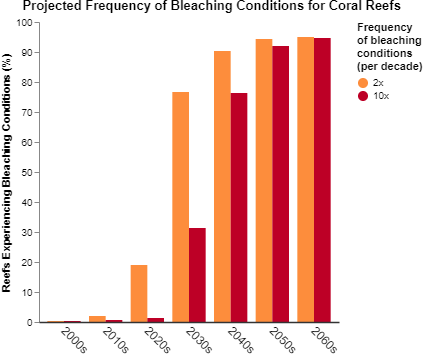

In [8]:
spec=json.loads("""
{
  "width": 300,
  "height": 300,
  "autosize": {"type": "pad", "resize": true, "contains": "padding"},
  "title": "Projected Frequency of Bleaching Conditions for Coral Reefs",
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {"events": "@cell:mouseover", "update": "datum"},
        {"events": "@cell:mouseout", "update": "null"}
      ]
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT decade_start, frequency, SUM(bleaching_area) AS bleaching_area, SUM(total_area) AS total_area, SUM(bleaching_area)/SUM(total_area) AS bleaching_fraction, SUM(SUM(bleaching_area)/SUM(total_area)) OVER (ORDER BY decade_start) AS bleaching_fraction_running FROM (SELECT cartodb_id, '2x' AS frequency, unnest(array[2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]) AS decade_start, unnest(array[_2000s_2x, _2010s_2x, _2020s_2x, _2030s_2x, _2040s_2x, _2050s_2x, _2060s_2x, _2070s_2x, _2080s_2x, _2090s_2x]) AS bleaching_area, reefarea AS total_area FROM ocn_calcs_003_reef_projected_bleaching_area_by_meow_per_decade) AS decadal_data GROUP BY decade_start, frequency UNION ALL SELECT decade_start, frequency, SUM(bleaching_area) AS bleaching_area, SUM(total_area) AS total_area, SUM(bleaching_area)/SUM(total_area) AS bleaching_fraction, SUM(SUM(bleaching_area)/SUM(total_area)) OVER (ORDER BY decade_start) AS bleaching_fraction_running FROM(SELECT cartodb_id, '10x' AS frequency, unnest(array[2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]) AS decade_start, unnest(array[_2000s_10x, _2010s_10x, _2020s_10x, _2030s_10x, _2040s_10x, _2050s_10x, _2060s_10x, _2070s_10x, _2080s_10x, _2090s_10x]) AS bleaching_area, reefarea AS total_area FROM ocn_calcs_003_reef_projected_bleaching_area_by_meow_per_decade) AS decadal_data GROUP BY decade_start, frequency ORDER BY decade_start ASC, frequency DESC",
      "format": {"type": "json", "property": "rows"},
      "transform": [
        {
          "type": "formula",
          "as": "bleaching_percentage",
          "expr": "datum.bleaching_fraction * 100.0"
        },
        {
          "type": "formula",
          "as": "bleaching_percentage_running",
          "expr": "datum.bleaching_fraction_running * 100.0"
        },
        {"type": "filter", "expr": "datum.decade_start < 2070"}
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "decade_start"},
      "range": "width",
      "padding": 0.2
    },
    {
      "name": "yscale",
      "type": "linear",
      "domain": {"data": "table", "field": "bleaching_percentage_running"},
      "range": "height",
      "round": true,
      "zero": true,
      "nice": true
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "table", "field": "frequency"},
      "range": ["#fd8d3c", "#bd0026"]
    }
  ],
  "axes": [
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Reefs Experiencing Bleaching Conditions (%)"
    },
    {
      "orient": "bottom",
      "scale": "xscale",
      "tickSize": 0,
      "labelPadding": 4,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": true,
          "update": {
            "text": {"signal": "datum.value + 's'"},
            "fill": {"value": "black"},
            "angle": {"value": 45},
            "fontSize": {"value": 12},
            "align": {"value": "left"},
            "baseline": {"value": "middle"},
            "dy": {"value": 2},
            "dx": {"value": 1}
          },
          "hover": {"fill": {"value": "firebrick"}}
        },
        "domain": {
          "update": {"stroke": {"value": "#333"}, "strokeWidth": {"value": 1.5}}
        }
      }
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {"data": "table", "name": "facet", "groupby": "decade_start"}
      },
      "encode": {"enter": {"x": {"scale": "xscale", "field": "decade_start"}}},
      "signals": [{"name": "width", "update": "bandwidth('xscale')"}],
      "scales": [
        {
          "name": "pos",
          "type": "band",
          "range": "width",
          "domain": {"data": "facet", "field": "frequency"}
        }
      ],
      "marks": [
        {
          "name": "bars",
          "from": {"data": "facet"},
          "type": "rect",
          "encode": {
            "enter": {
              "x": {"scale": "pos", "field": "frequency"},
              "width": {"scale": "pos", "band": 1},
              "y": {"scale": "yscale", "field": "bleaching_percentage_running"},
              "y2": {"scale": "yscale", "value": 0},
              "fill": {"scale": "color", "field": "frequency"},
              "tooltip": {
                "signal": "{title:'Coral experiencing bleaching ' + datum.frequency + '/decade in ' + datum.decade_start + 's', 'Fraction of global reef area':format(datum.bleaching_fraction_running,'.1%')}"
              }
            },
            "hover": {"fillOpacity": {"value": 0.5}},
            "update": {"fillOpacity": {"value": 1}}
          }
        }
      ]
    }
  ],
  "legends": [
    {
      "title": [
        "Frequency",
        "of bleaching",
        "conditions",
        "(per decade)"
      ],
      "fill": "color",
      "orient": "right"
    }
  ]
}
""")
vegaview=dict(spec)
Vega(vegaview)

### Resource Watch specification
API ID: <GID>  
https://resourcewatch.org/embed/widget/92dbd486-14dd-401f-a743-e05eab210a37<GID>

In [ ]:
spec=json.loads("""

""")
vegaview=dict(spec)
Vega(vegaview)

### Script to pass modified specification to RW via API
Based on [template in data-team-tool](https://github.com/resource-watch/data-team-tools/blob/6bf21e42d724b5f72060dd2f833864df8acad09e/map_embed_widget/embed_widget.py)

In [3]:
# import LMIPy as lmi
import os
import json
import requests
import dotenv
dotenv.load_dotenv(os.path.abspath(os.getenv('RW_ENV')))

True

In [7]:
# input widget API ID for the empty advanced widget you have created and want to overwrite
dataset_id = '9748a184-cf87-4363-bf81-2bf3030e2e53'
widget_to_overwrite = '92dbd486-14dd-401f-a743-e05eab210a37'

# replace the empty dictionary with the code from the vega editor
# replace true with True and null with None
vega = {
  "width": 300,
  "height": 300,
  "autosize": {"type": "pad", "resize": True, "contains": "padding"},
  "signals": [
    {
      "name": "hover",
      "value": None,
      "on": [
        {"events": "@cell:mouseover", "update": "datum"},
        {"events": "@cell:mouseout", "update": "null"}
      ]
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT decade_start, frequency, SUM(bleaching_area) AS bleaching_area, SUM(total_area) AS total_area, SUM(bleaching_area)/SUM(total_area) AS bleaching_fraction, SUM(SUM(bleaching_area)/SUM(total_area)) OVER (ORDER BY decade_start) AS bleaching_fraction_running FROM (SELECT cartodb_id, '2x' AS frequency, unnest(array[2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]) AS decade_start, unnest(array[_2000s_2x, _2010s_2x, _2020s_2x, _2030s_2x, _2040s_2x, _2050s_2x, _2060s_2x, _2070s_2x, _2080s_2x, _2090s_2x]) AS bleaching_area, reefarea AS total_area FROM ocn_calcs_003_reef_projected_bleaching_area_by_meow_per_decade) AS decadal_data GROUP BY decade_start, frequency UNION ALL SELECT decade_start, frequency, SUM(bleaching_area) AS bleaching_area, SUM(total_area) AS total_area, SUM(bleaching_area)/SUM(total_area) AS bleaching_fraction, SUM(SUM(bleaching_area)/SUM(total_area)) OVER (ORDER BY decade_start) AS bleaching_fraction_running FROM(SELECT cartodb_id, '10x' AS frequency, unnest(array[2000, 2010, 2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090]) AS decade_start, unnest(array[_2000s_10x, _2010s_10x, _2020s_10x, _2030s_10x, _2040s_10x, _2050s_10x, _2060s_10x, _2070s_10x, _2080s_10x, _2090s_10x]) AS bleaching_area, reefarea AS total_area FROM ocn_calcs_003_reef_projected_bleaching_area_by_meow_per_decade) AS decadal_data GROUP BY decade_start, frequency ORDER BY decade_start ASC, frequency DESC",
      "format": {"type": "json", "property": "rows"},
      "transform": [
        {
          "type": "formula",
          "as": "bleaching_percentage",
          "expr": "datum.bleaching_fraction * 100.0"
        },
        {
          "type": "formula",
          "as": "bleaching_percentage_running",
          "expr": "datum.bleaching_fraction_running * 100.0"
        },
        {"type": "filter", "expr": "datum.decade_start < 2070"}
      ]
    }
  ],
  "scales": [
    {
      "name": "xscale",
      "type": "band",
      "domain": {"data": "table", "field": "decade_start"},
      "range": "width",
      "padding": 0.2
    },
    {
      "name": "yscale",
      "type": "linear",
      "domain": {"data": "table", "field": "bleaching_percentage_running"},
      "range": "height",
      "round": True,
      "zero": True,
      "nice": True
    },
    {
      "name": "color",
      "type": "ordinal",
      "domain": {"data": "table", "field": "frequency"},
      "range": ["#fd8d3c", "#bd0026"]
    }
  ],
  "axes": [
    {
      "orient": "left",
      "scale": "yscale",
      "title": "Reefs Experiencing Bleaching Conditions (%)"
    },
    {
      "orient": "bottom",
      "scale": "xscale",
      "tickSize": 0,
      "labelPadding": 4,
      "zindex": 1,
      "encode": {
        "labels": {
          "interactive": True,
          "update": {
            "text": {"signal": "datum.value + 's'"},
            "fill": {"value": "black"},
            "angle": {"value": 45},
            "fontSize": {"value": 12},
            "align": {"value": "left"},
            "baseline": {"value": "middle"},
            "dy": {"value": 2},
            "dx": {"value": 1}
          },
          "hover": {"fill": {"value": "firebrick"}}
        },
        "domain": {
          "update": {"stroke": {"value": "#333"}, "strokeWidth": {"value": 1.5}}
        }
      }
    }
  ],
  "marks": [
    {
      "type": "group",
      "from": {
        "facet": {"data": "table", "name": "facet", "groupby": "decade_start"}
      },
      "encode": {"enter": {"x": {"scale": "xscale", "field": "decade_start"}}},
      "signals": [{"name": "width", "update": "bandwidth('xscale')"}],
      "scales": [
        {
          "name": "pos",
          "type": "band",
          "range": "width",
          "domain": {"data": "facet", "field": "frequency"}
        }
      ],
      "marks": [
        {
          "name": "bars",
          "from": {"data": "facet"},
          "type": "rect",
          "encode": {
            "enter": {
              "x": {"scale": "pos", "field": "frequency"},
              "width": {"scale": "pos", "band": 1},
              "y": {"scale": "yscale", "field": "bleaching_percentage_running"},
              "y2": {"scale": "yscale", "value": 0},
              "fill": {"scale": "color", "field": "frequency"},
              "tooltip": {
                "signal": "{'Decade':datum.decade_start+'s','Frequency':datum.frequency+'/decade','Reefs':format(datum.bleaching_fraction_running,'.1%')}"
              }
            },
            "hover": {"fillOpacity": {"value": 0.5}},
            "update": {"fillOpacity": {"value": 1}}
          }
        }
      ]
    }
  ],
  "legends": [
    {
      "title": [
        "Frequency",
        "of bleaching",
        "conditions",
        "(per decade)"
      ],
      "fill": "color",
      "orient": "right"
    }
  ]
}


# create payload to send to API
# you must edit the interaction_config
payload = {
    "widgetConfig": {
        "schema": "https://vega.github.io/schema/vega/v5.json",
        **vega,
        "interaction_config": [
          {
          }
        ],
      }
    }

# load in API credentials
API_TOKEN = os.getenv('RW_API_KEY')
headers = {
'Content-Type': 'application/json',
'Authorization': 'Bearer '+API_TOKEN, 
}

# load the widget we are going to overwrite
# option 1: LMIPY
#widget = lmi.Widget(widget_to_overwrite)
# option 2: requests
url = f'http://api.resourcewatch.org/v1/dataset/{dataset_id}/widget/{widget_to_overwrite}'

# Update the widget
# option 1: LMIPY
#widget = widget.update(update_params=payload, token=API_TOKEN)
# option 2: requests
r = requests.patch(url = url, json = payload, headers = headers)
print(r)

<Response [200]>
